Neural network to get galaxy type, Here only two types. 

In [3]:
#standard libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import sys
import os
#wcs is incompabible with newest numpy thus below not used 
#from astropy import wcs
#to access astronomical images in fits format
from astropy.io import fits
#torch functions
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
#sklearn helper functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score, log_loss
#xgboost for comparison
from xgboost import XGBClassifier
#logistic regression for comparison 
from sklearn.linear_model import LogisticRegression

Getting the data. It are 43 fields. From 310 (-50) degree to 60 degree in right ascension with a height from -1.26 to +1.26  degree in declination. 

In [4]:
cutouts1=np.load("stripe82_1_ell_spiral_im.npy")
cutouts2=np.load("stripe82_2_ell_spiral_im.npy")
cutouts3=np.load("stripe82_3_ell_spiral_im.npy")
cutouts4=np.load("stripe82_4_ell_spiral_im.npy")
cutouts5=np.load("stripe82_5_ell_spiral_im.npy")
cutouts6=np.load("stripe82_6_ell_spiral_im.npy")
cutouts7=np.load("stripe82_7_ell_spiral_im.npy")
cutouts8=np.load("stripe82_8_ell_spiral_im.npy")
cutouts9=np.load("stripe82_9_ell_spiral_im.npy")
cutouts10=np.load("stripe82_10_ell_spiral_im.npy")
cutouts11=np.load("stripe82_11_ell_spiral_im.npy")
cutouts12=np.load("stripe82_12_ell_spiral_im.npy")
cutouts13=np.load("stripe82_13_ell_spiral_im.npy")
cutouts14=np.load("stripe82_14_ell_spiral_im.npy")
cutouts15=np.load("stripe82_15_ell_spiral_im.npy")
cutouts16=np.load("stripe82_16_ell_spiral_im.npy")
cutouts17=np.load("stripe82_17_ell_spiral_im.npy")
cutouts18=np.load("stripe82_18_ell_spiral_im.npy")
cutouts19=np.load("stripe82_19_ell_spiral_im.npy")
cutouts20=np.load("stripe82_20_ell_spiral_im.npy")
cutouts21=np.load("stripe82_21_ell_spiral_im.npy")
cutouts22=np.load("stripe82_22_ell_spiral_im.npy")
cutouts23=np.load("stripe82_23_ell_spiral_im.npy")
cutouts24=np.load("stripe82_24_ell_spiral_im.npy")
cutouts25=np.load("stripe82_25_ell_spiral_im.npy")
cutouts26=np.load("stripe82_26_ell_spiral_im.npy")
cutouts27=np.load("stripe82_27_ell_spiral_im.npy")
cutouts28=np.load("stripe82_28_ell_spiral_im.npy")
cutouts29=np.load("stripe82_29_ell_spiral_im.npy")
cutouts30=np.load("stripe82_30_ell_spiral_im.npy")
cutouts31=np.load("stripe82_31_ell_spiral_im.npy")
cutouts32=np.load("stripe82_32_ell_spiral_im.npy")
cutouts33=np.load("stripe82_33_ell_spiral_im.npy")
cutouts34=np.load("stripe82_34_ell_spiral_im.npy")
cutouts35=np.load("stripe82_35_ell_spiral_im.npy")
cutouts36=np.load("stripe82_36_ell_spiral_im.npy")
cutouts37=np.load("stripe82_37_ell_spiral_im.npy")
cutouts38=np.load("stripe82_38_ell_spiral_im.npy")
cutouts39=np.load("stripe82_39_ell_spiral_im.npy")
cutouts40=np.load("stripe82_40_ell_spiral_im.npy")
cutouts41=np.load("stripe82_41_ell_spiral_im.npy")
cutouts42=np.load("stripe82_42_ell_spiral_im.npy")
cutouts43=np.load("stripe82_43_ell_spiral_im.npy")
print(cutouts1.shape)
#better a direct list later 
df1=pd.read_csv("stripe82_1_ell_spiral_table.csv")
df2=pd.read_csv("stripe82_2_ell_spiral_table.csv")
df3=pd.read_csv("stripe82_3_ell_spiral_table.csv")
df4=pd.read_csv("stripe82_4_ell_spiral_table.csv")
df5=pd.read_csv("stripe82_5_ell_spiral_table.csv")
df6=pd.read_csv("stripe82_6_ell_spiral_table.csv")
df7=pd.read_csv("stripe82_7_ell_spiral_table.csv")
df8=pd.read_csv("stripe82_8_ell_spiral_table.csv")
df9=pd.read_csv("stripe82_9_ell_spiral_table.csv")
df10=pd.read_csv("stripe82_10_ell_spiral_table.csv")
df11=pd.read_csv("stripe82_11_ell_spiral_table.csv")
df12=pd.read_csv("stripe82_12_ell_spiral_table.csv")
df13=pd.read_csv("stripe82_13_ell_spiral_table.csv")
df14=pd.read_csv("stripe82_14_ell_spiral_table.csv")
df15=pd.read_csv("stripe82_15_ell_spiral_table.csv")
df16=pd.read_csv("stripe82_16_ell_spiral_table.csv")
df17=pd.read_csv("stripe82_17_ell_spiral_table.csv")
df18=pd.read_csv("stripe82_18_ell_spiral_table.csv")
df19=pd.read_csv("stripe82_19_ell_spiral_table.csv")
df20=pd.read_csv("stripe82_20_ell_spiral_table.csv")
df21=pd.read_csv("stripe82_21_ell_spiral_table.csv")
df22=pd.read_csv("stripe82_22_ell_spiral_table.csv")
df23=pd.read_csv("stripe82_23_ell_spiral_table.csv")
df24=pd.read_csv("stripe82_24_ell_spiral_table.csv")
df25=pd.read_csv("stripe82_5_ell_spiral_table.csv")
df26=pd.read_csv("stripe82_6_ell_spiral_table.csv")
df27=pd.read_csv("stripe82_7_ell_spiral_table.csv")
df28=pd.read_csv("stripe82_8_ell_spiral_table.csv")
df29=pd.read_csv("stripe82_9_ell_spiral_table.csv")
df30=pd.read_csv("stripe82_10_ell_spiral_table.csv")
df31=pd.read_csv("stripe82_11_ell_spiral_table.csv")
df32=pd.read_csv("stripe82_12_ell_spiral_table.csv")
df33=pd.read_csv("stripe82_13_ell_spiral_table.csv")
df14=pd.read_csv("stripe82_14_ell_spiral_table.csv")
df15=pd.read_csv("stripe82_15_ell_spiral_table.csv")
df16=pd.read_csv("stripe82_16_ell_spiral_table.csv")
df17=pd.read_csv("stripe82_17_ell_spiral_table.csv")
df18=pd.read_csv("stripe82_18_ell_spiral_table.csv")
df19=pd.read_csv("stripe82_19_ell_spiral_table.csv")
df20=pd.read_csv("stripe82_20_ell_spiral_table.csv")
df21=pd.read_csv("stripe82_21_ell_spiral_table.csv")
df22=pd.read_csv("stripe82_22_ell_spiral_table.csv")
df23=pd.read_csv("stripe82_23_ell_spiral_table.csv")
df24=pd.read_csv("stripe82_24_ell_spiral_table.csv")
df25=pd.read_csv("stripe82_25_ell_spiral_table.csv")
df26=pd.read_csv("stripe82_26_ell_spiral_table.csv")
df27=pd.read_csv("stripe82_27_ell_spiral_table.csv")
df28=pd.read_csv("stripe82_28_ell_spiral_table.csv")
df29=pd.read_csv("stripe82_29_ell_spiral_table.csv")
df30=pd.read_csv("stripe82_30_ell_spiral_table.csv")
df31=pd.read_csv("stripe82_31_ell_spiral_table.csv")
df32=pd.read_csv("stripe82_32_ell_spiral_table.csv")
df33=pd.read_csv("stripe82_33_ell_spiral_table.csv")
df34=pd.read_csv("stripe82_34_ell_spiral_table.csv")
df35=pd.read_csv("stripe82_35_ell_spiral_table.csv")
df36=pd.read_csv("stripe82_36_ell_spiral_table.csv")
df37=pd.read_csv("stripe82_37_ell_spiral_table.csv")
df38=pd.read_csv("stripe82_38_ell_spiral_table.csv")
df39=pd.read_csv("stripe82_39_ell_spiral_table.csv")
df40=pd.read_csv("stripe82_40_ell_spiral_table.csv")
df41=pd.read_csv("stripe82_41_ell_spiral_table.csv")
df42=pd.read_csv("stripe82_42_ell_spiral_table.csv")
df43=pd.read_csv("stripe82_43_ell_spiral_table.csv")
print(df1.columns)

(43, 43, 1, 168)
Index(['Unnamed: 0', 'index', 'objid', 'ra', 'dec', 'psfMag_u', 'psfMag_g',
       'psfMag_r', 'psfMag_i', 'psfMag_z', 'probPSF_u', 'probPSF_g',
       'probPSF_r', 'probPSF_i', 'probPSF_z', 'modelMag_u', 'modelMag_g',
       'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroRad_g', 'petroRad_r',
       'petroRad_i', 'run', 'rerun', 'camcol', 'field', 'type', 'specobjid',
       'class', 'subclass', 'redshift', 'plate', 'mjd', 'fiberid', 'nvote',
       'p_el', 'p_cw', 'p_acw', 'p_edge', 'p_dk', 'p_mg', 'p_el_debiased',
       'p_cs_debiased', 'spiral', 'elliptical', 'uncertain', 'image',
       'pixel_x', 'pixel_y', 'off_image'],
      dtype='object')


Now I built the function to combine the four numpy arrays.

In [5]:
#combines numpy arrays of 4d shape, same shape first 3, last variable
def comb_nump_4d(input_list):
    l=0
    for i in range(len(input_list)):
        l+=input_list[i].shape[3]
    combined=np.zeros((input_list[0].shape[0],input_list[0].shape[1],input_list[0].shape[2],l))
    l=0
    for i in range(len(input_list)):
        combined[:,:,:,l:l+input_list[i].shape[3]]=input_list[i]
        l+=input_list[i].shape[3]  
    return combined

Combining the images. 

In [6]:
cutout_lists=[cutouts1,cutouts2,cutouts3,cutouts4,cutouts5,cutouts6,cutouts7,cutouts8,cutouts9,cutouts10,cutouts11,cutouts12,cutouts13,cutouts14,cutouts15,cutouts16,cutouts17,cutouts18,cutouts19,cutouts20,cutouts21,cutouts22,cutouts23,cutouts24,cutouts25,cutouts26,cutouts27,cutouts28,cutouts29,cutouts30,cutouts31,cutouts32,cutouts33,cutouts34,cutouts35,cutouts36,cutouts37,cutouts38,cutouts39,cutouts40,cutouts41,cutouts42,cutouts43]
cutouts=comb_nump_4d(cutout_lists)

Now combining the data frames with the classfications and more meta data. 

In [8]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36,df37,df38,df39,df40,df41,df42,df43],ignore_index=True)
print(df1.head(),df.head(),df43.tail(),df.tail())

   Unnamed: 0  index                objid         ra       dec  psfMag_u  \
0           0      1  1237663237128388701  50.130513 -1.228488  22.01211   
1           1    123  1237666299481817102  50.160628 -1.035026  19.01124   
2           2    140  1237663237128388949  50.167304 -1.241885  22.36878   
3           3    458  1237666300018557091  50.006004 -0.495751  21.98376   
4           4    110  1237663238739067202  50.387910  0.198944  21.86834   

   psfMag_g  psfMag_r  psfMag_i  psfMag_z  ...   p_mg  p_el_debiased  \
0  20.06700  18.86854  18.35853  17.93478  ...  0.032          0.935   
1  17.46116  16.85288  16.54355  16.19304  ...  0.000          0.971   
2  20.17246  18.94735  18.44240  17.99196  ...  0.000          0.964   
3  19.93291  18.73658  18.31895  17.89719  ...  0.000          0.893   
4  19.78908  18.63620  18.16101  17.63892  ...  0.018          0.755   

   p_cs_debiased  spiral  elliptical  uncertain  image      pixel_x  \
0          0.000       0           1   

Has worked, now looking on classes. 

In [9]:
print(df.spiral.value_counts())

1    5766
0    2109
Name: spiral, dtype: int64


Somewhat inbalanced, clearly more spirals than ellipctical galaxies.
 
Now adding columns to data frame that also other algorithms can work on it. 

In [10]:
x=0
for i in range(cutouts.shape[0]):
    for j in range(cutouts.shape[1]):
        df[x]=cutouts[i,j,0,:]
        x+=1
print(df)        

/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=cutouts[i,j,0,:]
/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=cutouts[i,j,0,:]
/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=

/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=cutouts[i,j,0,:]
/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=cutouts[i,j,0,:]
/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=

/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=cutouts[i,j,0,:]
/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=cutouts[i,j,0,:]
/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=

      Unnamed: 0  index                objid          ra       dec  psfMag_u  \
0              0      1  1237663237128388701   50.130513 -1.228488  22.01211   
1              1    123  1237666299481817102   50.160628 -1.035026  19.01124   
2              2    140  1237663237128388949   50.167304 -1.241885  22.36878   
3              3    458  1237666300018557091   50.006004 -0.495751  21.98376   
4              4    110  1237663238739067202   50.387910  0.198944  21.86834   
...          ...    ...                  ...         ...       ...       ...   
7870         101    101  1237663543675126583  312.305638  0.325466  21.65428   
7871         102    243  1237663543675060734  312.252401  0.351028  21.40535   
7872         103    257  1237678596459004706  312.353091  0.906897  20.69301   
7873         104    263  1237678596459070093  312.482143  0.899587  20.42247   
7874         105      8  1237678617933840840  312.415661  0.836877  21.30678   

      psfMag_g  psfMag_r  psfMag_i  psf

/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=cutouts[i,j,0,:]
/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=cutouts[i,j,0,:]
/tmp/ipykernel_16878/748454094.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x]=

In [11]:
print(df.columns[51],df.columns[1899])

0 1848


Now starting with torch spefifics. 

In [12]:
#adding cpu
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")



Using cpu device


In [13]:
feature_train, feature_test, target_train, target_test,image_train,image_test,df_train,df_test= train_test_split(df.iloc[:,51:1900],df.loc[:,"spiral"],cutouts.T,df,train_size=0.60, shuffle=True, random_state=1)
print("shape of image train data")
print(image_train.shape)
print(feature_test)

shape of image train data
(4725, 1, 43, 43)
           0          1          2          3          4          5     \
7250  -0.671509  -0.270374   0.568258   0.748187   0.106514   0.491256   
2896  14.361377  15.999631  15.021544  14.212921  16.437111  18.469778   
3329   1.400726   0.407343   0.848358   1.608956   1.318081   1.688733   
6120   1.741505   0.490504   0.683172   1.506649   1.003500   1.217041   
2842   1.038349   0.094624   1.703698   1.768898   0.666397   2.107406   
...         ...        ...        ...        ...        ...        ...   
7565  -0.421559   0.220490  -0.020975  -0.416924  -0.335829   1.411871   
551    7.063395   7.432566   7.274216   7.202036   6.730490   6.429748   
6019   1.913022   1.897351   3.837757   3.496063   2.804465   3.033000   
1625   0.714121   0.846052   0.592803   1.055074   0.230322   0.947309   
3707  24.069626  27.446905  30.535490  31.509089  31.743973  33.973873   

           6          7          8          9     ...       1839   

Now creating multiple entries for each by mirroring and rotations. First make image of the first without. 

(4725, 1, 43, 43)


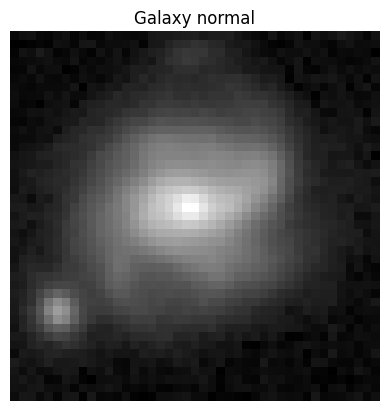

In [22]:
print(image_train.shape)
plt.axis('off')
plt.title("Galaxy normal")
plt.imshow(abs(image_train[2,0,:,:])**0.5,cmap=cm.gray, interpolation='nearest')

Thus getting all 7 other apparences means 3 rotations on original and flip on original 3 rotations on it. That are in total 8. 

In [23]:
def get_rot_mirror_square(dat):
    if dat.shape[0]!=dat.shape[1]:
        print("Data is not a square")
    else:
        res=np.zeros((8,dat.shape[0],dat.shape[1]))
        res[0,:,:]=dat
        res[4,:,:]=np.flip(dat,0)
        for i in range(3):
            res[1+i,:,:]=np.rot90(dat,k=i+1,axes=(0,1))
            res[5+i,:,:]=np.rot90(res[4,:,:],k=i+1,axes=(0,1))
        return res    

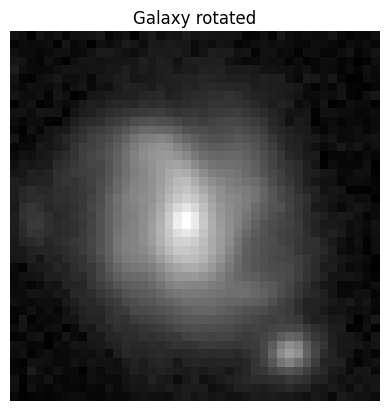

In [24]:
all_rots=get_rot_mirror_square(image_train[2,0,:,:])

plt.axis('off')
plt.title("Galaxy rotated")
plt.imshow(abs(all_rots[1,:,:])**0.5,cmap=cm.gray, interpolation='nearest')

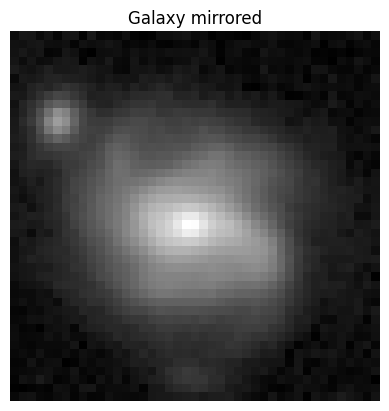

In [25]:
plt.axis('off')
plt.title("Galaxy mirrored")
plt.imshow(abs(all_rots[4,:,:])**0.5,cmap=cm.gray, interpolation='nearest')

All work.

In [26]:
def pred_torch(model,data):
    y_pred_list_c = []
    with torch.no_grad():
        model.eval()
        for X_batch, _ in data:
            X_batch = X_batch.to(device)
            y_test_pred = model(X_batch)
            y_pred_list_c.append(y_test_pred.cpu().numpy())
    y_pred_list_c = [a.squeeze().tolist() for a in y_pred_list_c]
    return y_pred_list_c  

In [27]:
class ClassificationDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [28]:
target_train, target_test = np.array(target_train), np.array(target_test)
feature_train, feature_test = np.array(feature_train), np.array(feature_test)


In [29]:
BATCH_SIZE=32

In [30]:
train_im_dataset = ClassificationDataset(torch.from_numpy(image_train).float(), torch.from_numpy(target_train).float())
test_im_dataset = ClassificationDataset(torch.from_numpy(image_test).float(), torch.from_numpy(target_test).float())
train_dataset = ClassificationDataset(torch.from_numpy(feature_train).float(), torch.from_numpy(target_train).float())
test_dataset = ClassificationDataset(torch.from_numpy(feature_test).float(), torch.from_numpy(target_test).float())


In [31]:
train_im_loader = DataLoader(dataset=train_im_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_im_loader = DataLoader(dataset=test_im_dataset, batch_size=1)
train_im_loader_pred = DataLoader(dataset=train_im_dataset, batch_size=1)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)
train_loader_pred = DataLoader(dataset=train_dataset, batch_size=1)

Perceptron network. 4 layers tried. 

In [32]:
#now 4 layers 
#two output options only 
class BinaryClassification4(nn.Module):
    def __init__(self, num_features):
        super(BinaryClassification4, self).__init__()
        self.fc1 = nn.Linear(num_features, 300)
        self.fc2 = nn.Linear(300, 100)  
        self.fc3 = nn.Linear(100, 30)        
        self.fc4 = nn.Linear(30, 10)   
        self.fc5 = nn.Linear(10, 1)          
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))        
        x = torch.sigmoid(self.fc5(x))
        return (x)

Now trying smaller networks, likely the data is too noisy and not large enough that the standard amount works.

In [33]:
EPOCHS = 40
BATCH_SIZE = 32
LEARNING_RATE = 0.001
NUM_FEATURES = 1849

In [34]:
#define the function to fit it
#parameters: model used, train_data, test_data, epchs, batch_size, learning_rate, file to collect stats, 
#optional regularization 
def torch_fit(model,train_loader,test_loader,epochs,batch_size,learning_rate,loss_stats,l2reg=0,silent=False):
    learning_rate = learning_rate
    criterion = torch.nn.BCELoss()    # Softmax is internally computed.
    #if no regularization
    if l2reg==0:
        optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    #l2 regularization is added in optimizer as weight_decay=1e-5 or nsimilar 
    else:
        optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate,weight_decay=l2reg)  
    if silent==False:    
        print("Begin training.")
    for e in tqdm(range(1, epochs+1)):
    
        # TRAINING
        train_epoch_loss = 0
        model.train()
        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
            optimizer.zero_grad()
        
            y_train_pred = model(X_train_batch)
        
            train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
            train_loss.backward()
            optimizer.step()
        
            train_epoch_loss += train_loss.item()
        
        
        # VALIDATION    
        with torch.no_grad():
        
            test_epoch_loss = 0
        
            model.eval()
            for X_test_batch, y_test_batch in test_loader:
                X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
            
                y_test_pred = model(X_test_batch)
                        
                test_loss = criterion(y_test_pred, y_test_batch.unsqueeze(1))
            
                test_epoch_loss += test_loss.item()
        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['test'].append(test_epoch_loss/len(test_loader))                              
        if silent==False:
            print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Test Loss: {test_epoch_loss/len(test_loader):.5f}')    

In [35]:
def conf_for_torch(predict,target):
    #round prediction
    round_pred=np.round(np.array(predict))
    conf_matrix = confusion_matrix(target, round_pred)
    return conf_matrix

In [51]:
# 2 116 12 | 116 182 test 71 71 | 76 130 
# 4  46 82 | 21 277 test  30 48 | 18 188
# seems to restart at each trail 
conf_test_m=conf_for_torch(m_test,target_test)
conf_train_m=conf_for_torch(m_train,target_train)
print("4 layer perceptron")
print("train")
print(conf_train_m)
print("test")
print(conf_test_m)
#some have 124 4 18 280 in train, test: 70 8 32 174
#now 16 samples, 40 epochs, train  256 38 81 711 
#now with 200 got into one sided train 0 454 0 1175

4 layer perceptron
train
[[ 697    0]
 [1989    0]]
test
[[ 521    0]
 [1271    0]]


Text(0, 0.5, 'BCE loss')

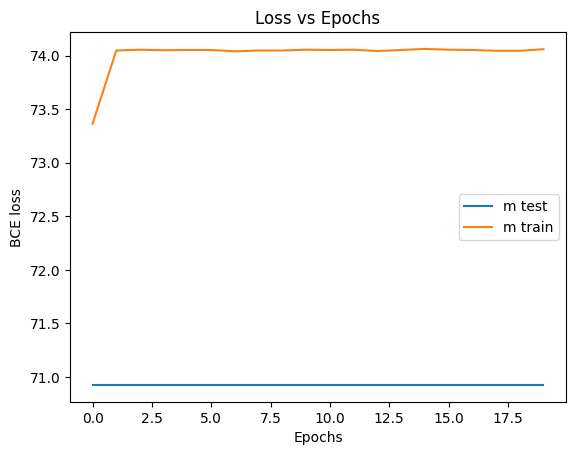

In [58]:
plt.plot(loss_stats_m['test'],label='m test')
plt.plot(loss_stats_m['train'],label='m train')
plt.legend(loc="best")
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('BCE loss')

Now I other other method for classification, first XGBoost. 

In [36]:
xc1=XGBClassifier(max_depth=6).fit(feature_train,target_train)

In [38]:
train_pred=xc1.predict(feature_train)
test_pred=xc1.predict(feature_test)
train_pred_prob=xc1.predict_proba(feature_train)
test_pred_prob=xc1.predict_proba(feature_test)
conf_train = confusion_matrix(target_train, train_pred)
conf_test = confusion_matrix(target_test, test_pred)
print("confusion matrix xgboost train")
print(conf_train)
print("confusion matrix xgboost test")
print(conf_test)
#16 test was 247 47 \ 55 737
#24 test was 440 61  \ 81 1210
#43 test it 753 117 / 116 2164

confusion matrix xgboost train
[[1238    1]
 [   0 3486]]
confusion matrix xgboost test
[[ 753  117]
 [ 116 2164]]


Xgboost works approximately with standard settings. Likely it can be improved because the train set is perfectly classified and thus thus clearly overfit. 

Now I try logistic. I really high number of iterations is needed, scaling features would help, but then regularization is more more random. 

In [39]:

lc1=LogisticRegression(max_iter=6000,penalty='none').fit(feature_train,target_train)

/home/tobias/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
l_train_pred=lc1.predict(feature_train)
l_test_pred=lc1.predict(feature_test)
l_train_pred_prob=lc1.predict_proba(feature_train)
l_test_pred_prob=lc1.predict_proba(feature_test)
l_conf_train = confusion_matrix(target_train, l_train_pred)
l_conf_test = confusion_matrix(target_test, l_test_pred)
print("confusion matrix logistic regression train")
print(l_conf_train)
print("confusion matrix logistic regression test")
print(l_conf_test)
#16 test  169 125 \ 245 547
#24 test  276 245 \ 349 922 gets worse in the minor class,better in the main 
#43 test  478 392\ 540 11740 now again getting better

confusion matrix logistic regression train
[[1205   34]
 [  20 3466]]
confusion matrix logistic regression test
[[ 478  392]
 [ 540 1740]]


Logistic works less good as xgboost and does not improve clearlz with more data. Means that wrong features are fit then. Both should improve with regularization. 

In [41]:
def loop_xgboost(feature_train,target_train,feature_test,target_test,regs):
    stats=np.zeros((5,len(regs)))
    for i in range(len(regs)):
        print(f"doing l2 regularization {regs[i]}")
        xc1=XGBClassifier(max_depth=6,reg_lambda=regs[i]).fit(feature_train,target_train)
        train_pred=xc1.predict(feature_train)
        test_pred=xc1.predict(feature_test)
        train_pred_prob=xc1.predict_proba(feature_train)
        test_pred_prob=xc1.predict_proba(feature_test)
        stats[0,i]=regs[i]
        stats[1,i]=f1_score(target_train,train_pred)
        stats[2,i]=f1_score(target_test,test_pred)       
        stats[3,i]=log_loss(target_train,train_pred_prob)
        stats[4,i]=log_loss(target_test,test_pred_prob)
    return stats

In [ ]:
regs=[0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000,3000,10000]
stats_xgb=loop_xgboost(feature_train,target_train,feature_test,target_test,regs)
print(stats_xgb.T)
np.savetxt("xgb_43sets_gal-type_v1.txt",stats_xgb)

doing l2 regularization 0.0001
doing l2 regularization 0.0003
doing l2 regularization 0.001
doing l2 regularization 0.003
doing l2 regularization 0.01
doing l2 regularization 0.03
doing l2 regularization 0.1
doing l2 regularization 0.3
doing l2 regularization 1
doing l2 regularization 3
doing l2 regularization 10
doing l2 regularization 30


Now defining function to do the regularization loop for logistic. 

In [72]:
def loop_logistic(feature_train,target_train,feature_test,target_test,regs):
    stats=np.zeros((5,len(regs)))
    for i in range(len(regs)):
        print(f"doing l2 regularization {regs[i]}") #does not always converge but are cases which are certainly not useful ones
        xc1=LogisticRegression(max_iter=10000,penalty='l2',C=regs[i]).fit(feature_train,target_train)
        train_pred=xc1.predict(feature_train)
        test_pred=xc1.predict(feature_test)
        train_pred_prob=xc1.predict_proba(feature_train)
        test_pred_prob=xc1.predict_proba(feature_test)
        stats[0,i]=regs[i]
        stats[1,i]=f1_score(target_train,train_pred)
        stats[2,i]=f1_score(target_test,test_pred)       
        stats[3,i]=log_loss(target_train,train_pred_prob)
        stats[4,i]=log_loss(target_test,test_pred_prob)
    return stats

In [73]:
regs=[0.0000000001,0.000000003,0.00000001,0.00000003,0.0000001,0.0000003,0.000001,0.000003,0.00001,0.00003,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100]
print(regs)
stats_log=loop_logistic(feature_train,target_train,feature_test,target_test,regs)
print(np.round(stats_log.T,5))
np.savetxt("log_43sets_gal-type_v1.txt",stats_log)

[1e-10, 3e-09, 1e-08, 3e-08, 1e-07, 3e-07, 1e-06, 3e-06, 1e-06, 3e-06, 1e-05, 3e-05, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]


Now plotting both, first f1 score. 

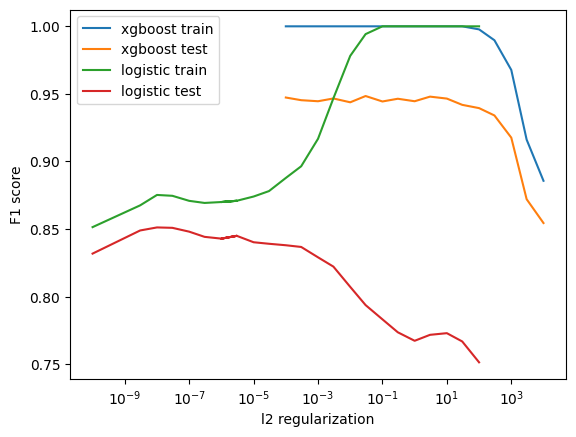

In [76]:
stats_xgb=n.loadtxt("xgb_43sets_gal-type_v1.txt")
stats_log=n.loadtxt("log_24sets_gal-type_v1.txt")
plt.plot(stats_xgb[0],stats_xgb[1],label='xgboost train')
plt.plot(stats_xgb[0],stats_xgb[2],label='xgboost test')
plt.plot(stats_log[0],stats_log[1],label='logistic train')
plt.plot(stats_log[0],stats_log[2],label='logistic test')
plt.legend(loc="best")
#plt.title('Loss vs Epochs')
plt.xlabel('l2 regularization')
plt.ylabel('F1 score')
plt.xscale("log")

Then log loss. 

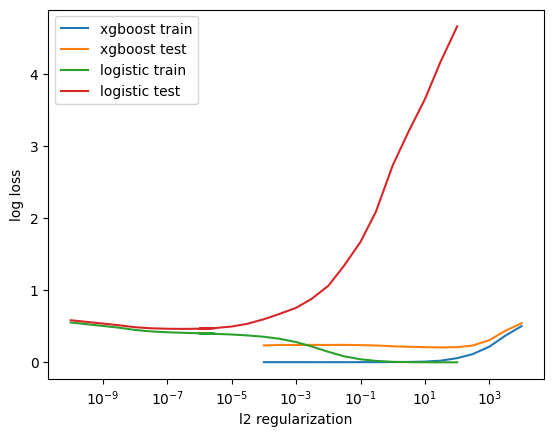

In [77]:
plt.plot(stats_xgb[0],stats_xgb[3],label='xgboost train')
plt.plot(stats_xgb[0],stats_xgb[4],label='xgboost test')
plt.plot(stats_log[0],stats_log[3],label='logistic train')
plt.plot(stats_log[0],stats_log[4],label='logistic test')
plt.legend(loc="best")
#plt.title('Loss vs Epochs')
plt.xlabel('l2 regularization')
plt.ylabel('log loss')
#plt.ylim(0,0.7)
plt.xscale("log")

Xgboost is clearly better. It is in the not so much data limit where adding regularziation is not clearly improving test at F1 score. Below I zoom into log loss to see whether there is a minimum.

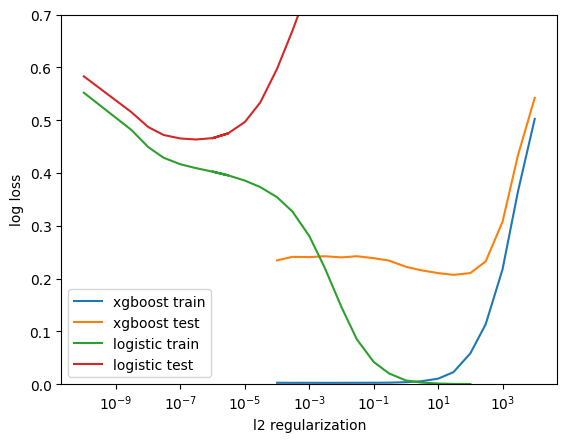

In [78]:
plt.plot(stats_xgb[0],stats_xgb[3],label='xgboost train')
plt.plot(stats_xgb[0],stats_xgb[4],label='xgboost test')
plt.plot(stats_log[0],stats_log[3],label='logistic train')
plt.plot(stats_log[0],stats_log[4],label='logistic test')
plt.legend(loc="best")
#plt.title('Loss vs Epochs')
plt.xlabel('l2 regularization')
plt.ylabel('log loss')
plt.ylim(0,0.7)
plt.xscale("log")

There is one now at not extactly the same position as the local maximum in the F1 score. For linear there is also a minimum now visible, a clearly worse, but still better than a constant probability, similar as to xgboost the local shifts compared to the local maximum in the F1 score.  That shifting is bot ideal, I should likely add rotations mirrorring versions for fitting in any case but is unlikely to solve the main torch problem since it only incrtease the data amount by a factor 8 even if there is no more fundamental problem in torch, which is not clear. Still similar with 24 data sets, it only looks slowly better.

Test input outputs relations for convolutional network of 3 convolutional layers, it is still 3 *3 convolutional and 2 *2 maximuma.

In [80]:
input0 = torch.randn(1, 1, 43, 43)
b=torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)
output0=b(input0)
print(f"first conv layer input: {input0.shape} output: {output0.shape}")

m = nn.MaxPool2d((2, 2), stride=(2, 2))
#standard drops but can be changed, can also use pooling and co get better number 
output1 = m(output0)
print(f"max pool input:{output0.shape} output:{output1.shape}")
#input format (Batch, Number Channels, height, width)
b2=torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0)

output2=b2(output1)
print(f"second conv layer input: {output1.shape} output: {output2.shape}")
output3 = m(output2)
print(f"second max pool layer input: {output2.shape} output: {output3.shape}")

b3=torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)

output4=b3(output3)
print(f"third conv layer input: {output3.shape} output: {output4.shape}")
output5 = m(output4)
print(f"third max pool layer input: {output4.shape} output: {output5.shape}")

first conv layer input: torch.Size([1, 1, 43, 43]) output: torch.Size([1, 16, 41, 41])
max pool input:torch.Size([1, 16, 41, 41]) output:torch.Size([1, 16, 20, 20])
second conv layer input: torch.Size([1, 16, 20, 20]) output: torch.Size([1, 32, 18, 18])
second max pool layer input: torch.Size([1, 32, 18, 18]) output: torch.Size([1, 32, 9, 9])
third conv layer input: torch.Size([1, 32, 9, 9]) output: torch.Size([1, 64, 7, 7])
third max pool layer input: torch.Size([1, 64, 7, 7]) output: torch.Size([1, 64, 3, 3])


In [94]:
class CNNBinary4(torch.nn.Module):
    #no padding because image does not really end when the data ends. 
    def __init__(self):
        super(CNNBinary4, self).__init__()
        # L1 ImgIn shape=(?, 43, 43, 1)
        # Conv -> (?, 41, 41, 16)
        # Pool -> (?, 20, 20, 16)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=1 - keep_prob))
        # L2 ImgIn shape=(?, 20, 20, 16)
        # Conv      ->(?, 18, 18, 32)
        # Pool      ->(?, 9, 9, 32)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=1 - keep_prob))
        # L3 ImgIn shape=(?, 9, 9, 32)
        # Conv      ->(?, 7, 7, 64)
        # Pool      ->(?, 3, 3, 64)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=1 - keep_prob))        
        # L3 FC 3x3x64 inputs -> 128 outputs
        self.fc1 = torch.nn.Linear(3 * 3 * 64, 128, bias=True)
        torch.nn.init.xavier_uniform(self.fc1.weight) #old
        #nn.init.xavier_uniform_.torch.nn.init.xavier_uniform(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - keep_prob))
        # L4 Final FC 128 inputs -> 1 output
        self.fc2 = torch.nn.Linear(128, 1, bias=True) #
        torch.nn.init.xavier_uniform_(self.fc2.weight) # initialize parameters
        #nn.init.xavier_uniform_.torch.nn.init.xavier_uniform(self.fc1.weight)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out) #dont forget to add/omit layer here
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        out = torch.sigmoid(self.fc2(out))       
        return out

In [77]:
#that are stars could be added as class, but likely only in other notebook 
cutouts_s1=np.load("stripe82_1_stars_im.npy")
cutouts_s2=np.load("stripe82_2_stars_im.npy")
cutouts_s3=np.load("stripe82_3_stars_im.npy")
cutouts_s4=np.load("stripe82_4_stars_im.npy")
print(cutouts_s1.shape,cutouts_s2.shape,cutouts_s3.shape,cutouts_s4.shape)

(43, 43, 1, 613) (43, 43, 1, 795) (43, 43, 1, 831) (43, 43, 1, 621)
(43, 43, 1, 2715)
(43, 43, 1, 5575)
[1. 1. 1. ... 0. 0. 0.]


Now same set up new network and data.

In [102]:
keep_prob=1
model2c =CNNBinary4()
model2c.to(device)
print(model2c)
loss_stats_st11c = {
    'train': [], 'test': []
}
torch_fit(model2c,train_im_loader,test_im_loader,40,32,0.001,loss_stats_st11c)

CNNBinary4(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0, inplace=False)
  )
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=576, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
  )
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)
Begin training.


/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.78817 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 003: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 004: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 005: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 006: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 007: | Train Loss: 25.95734 | Test Loss: 29.07366
Epoch 008: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 009: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 010: | Train Loss: 25.95486 | Test Loss: 29.07366
Epoch 011: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 012: | Train Loss: 25.95734 | Test Loss: 29.07366
Epoch 013: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 014: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 015: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 016: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 017: | Train Loss: 25.95486 | Test Loss: 29.07366
Epoch 018: | Train Loss: 25.94990 | Test Loss: 2

Does not work in 1,2, 3,4 5,trials. 

In [104]:
#loop on regularization 
#model used, train set, test set, train set for predict, train_target, test_target
#epochs, batch?size, alpha of fit, list of regularization, optional number of features needed for perceptron 
def run_loop_torch(model,train,test,train_for_pred,train_target,test_target,epochs,batch,alpha,regs,num_features=0):
    stats=np.zeros((5,len(regs)))
    for i in range(len(regs)):
        print(f"running reg of {regs[i]}")
        keep_prob=1
        if num_features==0:
            model3 =model()
        else:
            #num_features partlz needed
            model3 =model(num_features)            
        model3.to(device)
        loss_stats_test3 = {
        'train': [], 'test': []
        }
        torch_fit(model3,train,test,epochs,batch,alpha,loss_stats_test3,l2reg=regs[i])
        test_pred=pred_torch(model3,test)
        train_pred=pred_torch(model3,train_for_pred)
        stats[0,i]=regs[i]
        stats[1,i]=f1_score(train_target,np.round(train_pred))
        stats[2,i]=f1_score(test_target,np.round(test_pred))
        stats[3,i]=log_loss(train_target,(train_pred))
        stats[4,i]=log_loss(test_target,(test_pred))   
        print(f"stats of l2reg of  {regs[i]} are {np.round(stats[1:5,i],5)}")
    print(f"full stats are {np.round(stats[:,:].T,5)}")
    return stats

Now loop with different regularizations. 

In [132]:
regs=[0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1]
stats_4cn=run_loop_torch(CNNBinary4,train_im_loader,test_im_loader,train_im_loader_pred,target_train,target_test,200,64,0.001,regs)
np.savetxt("conv2d_4n_v1_gal_200.txt",stats_4cn)

running reg of 0.0001
Begin training.


/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 72.72895 | Test Loss: 70.89854
Epoch 002: | Train Loss: 74.05754 | Test Loss: 70.89962
Epoch 003: | Train Loss: 74.05754 | Test Loss: 70.90014
Epoch 004: | Train Loss: 74.04762 | Test Loss: 70.90043
Epoch 005: | Train Loss: 74.05506 | Test Loss: 70.90062
Epoch 006: | Train Loss: 74.05506 | Test Loss: 70.90075
Epoch 007: | Train Loss: 74.05010 | Test Loss: 70.90080
Epoch 008: | Train Loss: 74.05010 | Test Loss: 70.90079
Epoch 009: | Train Loss: 74.05258 | Test Loss: 70.90072
Epoch 010: | Train Loss: 74.05506 | Test Loss: 70.90062
Epoch 011: | Train Loss: 74.04266 | Test Loss: 70.90048
Epoch 012: | Train Loss: 74.05010 | Test Loss: 70.90031
Epoch 013: | Train Loss: 74.06002 | Test Loss: 70.90011
Epoch 014: | Train Loss: 74.04266 | Test Loss: 70.89989
Epoch 015: | Train Loss: 74.06002 | Test Loss: 70.89963
Epoch 016: | Train Loss: 74.05754 | Test Loss: 70.89934
Epoch 017: | Train Loss: 74.05258 | Test Loss: 70.89902
Epoch 018: | Train Loss: 74.05506 | Test Loss: 7

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.69725 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.94246 | Test Loss: 29.07366
Epoch 003: | Train Loss: 25.95734 | Test Loss: 29.07366
Epoch 004: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 005: | Train Loss: 25.95982 | Test Loss: 29.07366
Epoch 006: | Train Loss: 25.95486 | Test Loss: 29.07366
Epoch 007: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 008: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 009: | Train Loss: 25.95486 | Test Loss: 29.07366
Epoch 010: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 011: | Train Loss: 25.93750 | Test Loss: 29.07366
Epoch 012: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 013: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 014: | Train Loss: 25.96230 | Test Loss: 29.07366
Epoch 015: | Train Loss: 25.94246 | Test Loss: 29.07366
Epoch 016: | Train Loss: 25.95982 | Test Loss: 29.07366
Epoch 017: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 018: | Train Loss: 25.94990 | Test Loss: 2

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 26.04601 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.96478 | Test Loss: 29.07366
Epoch 003: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 004: | Train Loss: 25.93750 | Test Loss: 29.07366
Epoch 005: | Train Loss: 25.95734 | Test Loss: 29.07366
Epoch 006: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 007: | Train Loss: 25.95734 | Test Loss: 29.07366
Epoch 008: | Train Loss: 25.96230 | Test Loss: 29.07366
Epoch 009: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 010: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 011: | Train Loss: 25.93750 | Test Loss: 29.07366
Epoch 012: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 013: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 014: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 015: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 016: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 017: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 018: | Train Loss: 25.95982 | Test Loss: 2

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.79541 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 003: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 004: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 005: | Train Loss: 25.93998 | Test Loss: 29.07366
Epoch 006: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 007: | Train Loss: 25.95734 | Test Loss: 29.07366
Epoch 008: | Train Loss: 25.95982 | Test Loss: 29.07366
Epoch 009: | Train Loss: 25.94246 | Test Loss: 29.07366
Epoch 010: | Train Loss: 25.95486 | Test Loss: 29.07366
Epoch 011: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 012: | Train Loss: 25.95982 | Test Loss: 29.07366
Epoch 013: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 014: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 015: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 016: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 017: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 018: | Train Loss: 25.94742 | Test Loss: 2

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.82339 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 003: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 004: | Train Loss: 25.96726 | Test Loss: 29.07366
Epoch 005: | Train Loss: 25.95734 | Test Loss: 29.07366
Epoch 006: | Train Loss: 25.94246 | Test Loss: 29.07366
Epoch 007: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 008: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 009: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 010: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 011: | Train Loss: 25.95486 | Test Loss: 29.07366
Epoch 012: | Train Loss: 25.95734 | Test Loss: 29.07366
Epoch 013: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 014: | Train Loss: 25.95486 | Test Loss: 29.07366
Epoch 015: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 016: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 017: | Train Loss: 25.94990 | Test Loss: 29.07366
Epoch 018: | Train Loss: 25.95238 | Test Loss: 2

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.40148 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.94246 | Test Loss: 29.07366
Epoch 003: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 004: | Train Loss: 25.94246 | Test Loss: 29.07366
Epoch 005: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 006: | Train Loss: 18.40362 | Test Loss: 0.58268
Epoch 007: | Train Loss: 0.48716 | Test Loss: 0.45691
Epoch 008: | Train Loss: 0.37295 | Test Loss: 0.48901
Epoch 009: | Train Loss: 0.31355 | Test Loss: 0.26517
Epoch 010: | Train Loss: 0.24882 | Test Loss: 0.26673
Epoch 011: | Train Loss: 0.23503 | Test Loss: 0.23348
Epoch 012: | Train Loss: 0.25046 | Test Loss: 0.21467
Epoch 013: | Train Loss: 0.21651 | Test Loss: 0.21482
Epoch 014: | Train Loss: 0.22453 | Test Loss: 0.21701
Epoch 015: | Train Loss: 0.19486 | Test Loss: 0.20144
Epoch 016: | Train Loss: 0.19812 | Test Loss: 0.19882
Epoch 017: | Train Loss: 0.19776 | Test Loss: 0.21919
Epoch 018: | Train Loss: 0.20300 | Test Loss: 0.26643
Epoch 019: | Trai

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.84004 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.95238 | Test Loss: 29.07366
Epoch 003: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 004: | Train Loss: 25.94246 | Test Loss: 29.07366
Epoch 005: | Train Loss: 25.94494 | Test Loss: 29.07366
Epoch 006: | Train Loss: 25.94246 | Test Loss: 29.02675
Epoch 007: | Train Loss: 15.43619 | Test Loss: 0.56144
Epoch 008: | Train Loss: 0.47514 | Test Loss: 0.43651
Epoch 009: | Train Loss: 0.43396 | Test Loss: 0.40796
Epoch 010: | Train Loss: 0.40408 | Test Loss: 0.35545
Epoch 011: | Train Loss: 0.42279 | Test Loss: 0.37019
Epoch 012: | Train Loss: 0.39300 | Test Loss: 0.38045
Epoch 013: | Train Loss: 0.39017 | Test Loss: 0.36099
Epoch 014: | Train Loss: 0.38140 | Test Loss: 0.34716
Epoch 015: | Train Loss: 0.39298 | Test Loss: 0.34541
Epoch 016: | Train Loss: 0.37137 | Test Loss: 0.32291
Epoch 017: | Train Loss: 0.41941 | Test Loss: 0.32451
Epoch 018: | Train Loss: 0.36609 | Test Loss: 0.40017
Epoch 019: | Tr

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.79260 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.54990 | Test Loss: 10.04900
Epoch 003: | Train Loss: 0.94811 | Test Loss: 0.54735
Epoch 004: | Train Loss: 0.52408 | Test Loss: 0.49357
Epoch 005: | Train Loss: 0.58657 | Test Loss: 0.57352
Epoch 006: | Train Loss: 0.53532 | Test Loss: 0.51367
Epoch 007: | Train Loss: 0.50068 | Test Loss: 0.49159
Epoch 008: | Train Loss: 0.47992 | Test Loss: 0.48967
Epoch 009: | Train Loss: 0.46870 | Test Loss: 0.46737
Epoch 010: | Train Loss: 0.45523 | Test Loss: 0.46873
Epoch 011: | Train Loss: 0.46068 | Test Loss: 0.46332
Epoch 012: | Train Loss: 0.50645 | Test Loss: 0.47917
Epoch 013: | Train Loss: 0.45674 | Test Loss: 0.47425
Epoch 014: | Train Loss: 0.48812 | Test Loss: 0.45866
Epoch 015: | Train Loss: 0.48696 | Test Loss: 0.44552
Epoch 016: | Train Loss: 0.45721 | Test Loss: 0.44271
Epoch 017: | Train Loss: 0.46357 | Test Loss: 0.44395
Epoch 018: | Train Loss: 0.48709 | Test Loss: 0.44128
Epoch 019: | Train Loss:

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.80839 | Test Loss: 25.84713
Epoch 002: | Train Loss: 1.82224 | Test Loss: 0.58842
Epoch 003: | Train Loss: 0.57560 | Test Loss: 0.63237
Epoch 004: | Train Loss: 0.59934 | Test Loss: 0.60675
Epoch 005: | Train Loss: 0.61033 | Test Loss: 0.62189
Epoch 006: | Train Loss: 0.61746 | Test Loss: 0.63183
Epoch 007: | Train Loss: 0.61832 | Test Loss: 0.63568
Epoch 008: | Train Loss: 0.63660 | Test Loss: 0.65553
Epoch 009: | Train Loss: 0.64716 | Test Loss: 0.65795
Epoch 010: | Train Loss: 0.65225 | Test Loss: 0.65827
Epoch 011: | Train Loss: 0.65189 | Test Loss: 0.65785
Epoch 012: | Train Loss: 0.65199 | Test Loss: 0.65747
Epoch 013: | Train Loss: 0.65104 | Test Loss: 0.65737
Epoch 014: | Train Loss: 0.65174 | Test Loss: 0.65792
Epoch 015: | Train Loss: 0.65181 | Test Loss: 0.65732
Epoch 016: | Train Loss: 0.65090 | Test Loss: 0.65791
Epoch 017: | Train Loss: 0.65170 | Test Loss: 0.65742
Epoch 018: | Train Loss: 0.65178 | Test Loss: 0.65742
Epoch 019: | Train Loss: 0

It now works sometimes (in run with 10), but lots of chance and not often. 

In [128]:
stats_4n_10=np.loadtxt("conv2d_4n_v1_gal_10.txt")
stats_4n_20=np.loadtxt("conv2d_4n_v1_gal_20.txt")
stats_4n_30=np.loadtxt("conv2d_4n_v1_gal_30.txt")
stats_4n_40=np.loadtxt("conv2d_4n_v1_gal_40.txt")
stats_4n_60=np.loadtxt("conv2d_4n_v1_gal_60.txt")
stats_4n_100=np.loadtxt("conv2d_4n_v1_gal_100.txt")

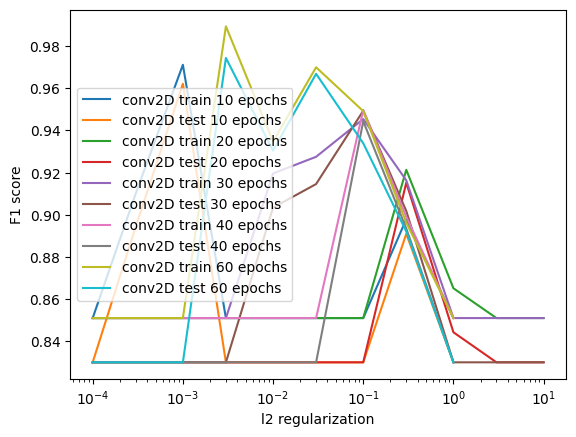

In [129]:
plt.plot(stats_4n_10[0],stats_4n_10[1],label='conv2D train 10 epochs')
plt.plot(stats_4n_10[0],stats_4n_10[2],label='conv2D test 10 epochs')
plt.plot(stats_4n_20[0],stats_4n_20[1],label='conv2D train 20 epochs')
plt.plot(stats_4n_20[0],stats_4n_20[2],label='conv2D test 20 epochs')
plt.plot(stats_4n_30[0],stats_4n_30[1],label='conv2D train 30 epochs')
plt.plot(stats_4n_30[0],stats_4n_30[2],label='conv2D test 30 epochs')
plt.plot(stats_4n_40[0],stats_4n_40[1],label='conv2D train 40 epochs')
plt.plot(stats_4n_40[0],stats_4n_40[2],label='conv2D test 40 epochs')
plt.plot(stats_4n_60[0],stats_4n_60[1],label='conv2D train 60 epochs')
plt.plot(stats_4n_60[0],stats_4n_60[2],label='conv2D test 60 epochs')
#plt.plot(per_stats[0],per_stats[1],label='perceptron train')
#plt.plot(per_stats[0],per_stats[2],label='perceptron test')
#plt.plot(stats_xgb[0],stats_xgb[1],label='xgboost train')
#plt.plot(stats_xgb[0],stats_xgb[2],label='xgboost test')
#plt.plot(stats_log[0],stats_log[1],label='logistic train')
#plt.plot(stats_log[0],stats_log[2],label='logistic test')
plt.legend(loc="best")
#plt.title('Loss vs Epochs')
plt.xlabel('l2 regularization')
plt.ylabel('F1 score')
#plt.ylim(0,0.7)
plt.xscale("log")

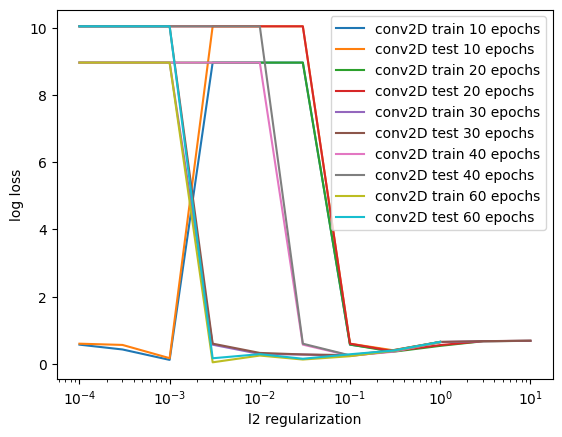

In [130]:
plt.plot(stats_4n_10[0],stats_4n_10[3],label='conv2D train 10 epochs')
plt.plot(stats_4n_10[0],stats_4n_10[4],label='conv2D test 10 epochs')
plt.plot(stats_4n_20[0],stats_4n_20[3],label='conv2D train 20 epochs')
plt.plot(stats_4n_20[0],stats_4n_20[4],label='conv2D test 20 epochs')
plt.plot(stats_4n_30[0],stats_4n_30[3],label='conv2D train 30 epochs')
plt.plot(stats_4n_30[0],stats_4n_30[4],label='conv2D test 30 epochs')
plt.plot(stats_4n_40[0],stats_4n_40[3],label='conv2D train 40 epochs')
plt.plot(stats_4n_40[0],stats_4n_40[4],label='conv2D test 40 epochs')
plt.plot(stats_4n_60[0],stats_4n_60[3],label='conv2D train 60 epochs')
plt.plot(stats_4n_60[0],stats_4n_60[4],label='conv2D test 60 epochs')
#plt.plot(per_stats[0],per_stats[1],label='perceptron train')
#plt.plot(per_stats[0],per_stats[2],label='perceptron test')
#plt.plot(stats_xgb[0],stats_xgb[1],label='xgboost train')
#plt.plot(stats_xgb[0],stats_xgb[2],label='xgboost test')
#plt.plot(stats_log[0],stats_log[1],label='logistic train')
#plt.plot(stats_log[0],stats_log[2],label='logistic test')
plt.legend(loc="best")
#plt.title('Loss vs Epochs')
plt.xlabel('l2 regularization')
plt.ylabel('log loss')
#plt.ylim(0,0.7)
plt.xscale("log")

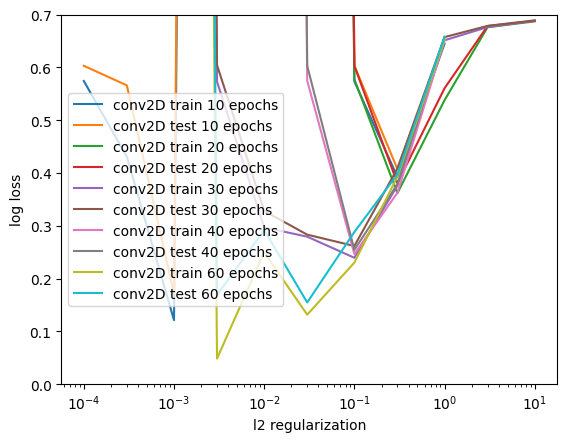

In [131]:
plt.plot(stats_4n_10[0],stats_4n_10[3],label='conv2D train 10 epochs')
plt.plot(stats_4n_10[0],stats_4n_10[4],label='conv2D test 10 epochs')
plt.plot(stats_4n_20[0],stats_4n_20[3],label='conv2D train 20 epochs')
plt.plot(stats_4n_20[0],stats_4n_20[4],label='conv2D test 20 epochs')
plt.plot(stats_4n_30[0],stats_4n_30[3],label='conv2D train 30 epochs')
plt.plot(stats_4n_30[0],stats_4n_30[4],label='conv2D test 30 epochs')
plt.plot(stats_4n_40[0],stats_4n_40[3],label='conv2D train 40 epochs')
plt.plot(stats_4n_40[0],stats_4n_40[4],label='conv2D test 40 epochs')
plt.plot(stats_4n_60[0],stats_4n_60[3],label='conv2D train 60 epochs')
plt.plot(stats_4n_60[0],stats_4n_60[4],label='conv2D test 60 epochs')
#plt.plot(per_stats[0],per_stats[1],label='perceptron train')
#plt.plot(per_stats[0],per_stats[2],label='perceptron test')
#plt.plot(stats_xgb[0],stats_xgb[1],label='xgboost train')
#plt.plot(stats_xgb[0],stats_xgb[2],label='xgboost test')
#plt.plot(stats_log[0],stats_log[1],label='logistic train')
#plt.plot(stats_log[0],stats_log[2],label='logistic test')
plt.legend(loc="best")
#plt.title('Loss vs Epochs')
plt.xlabel('l2 regularization')
plt.ylabel('log loss')
plt.ylim(0,0.7)
plt.xscale("log")

Larger regularizations seem easier. Could I first converge them and then do lower regularization after them? 
Or just enough iterations? 

In [133]:
keep_prob=1
model2d =CNNBinary4()
model2d.to(device)
print(model2d)
loss_stats_st13c = {
    'train': [], 'test': []
}
torch_fit(model2d,train_im_loader,test_im_loader,20,32,0.001,loss_stats_st13c,l2reg=0.3)

CNNBinary4(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0, inplace=False)
  )
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=576, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
  )
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)
Begin training.


/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.65726 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.95486 | Test Loss: 29.07366
Epoch 003: | Train Loss: 25.94246 | Test Loss: 28.88298
Epoch 004: | Train Loss: 5.47718 | Test Loss: 0.59840
Epoch 005: | Train Loss: 0.53514 | Test Loss: 0.64067
Epoch 006: | Train Loss: 0.50466 | Test Loss: 0.48764
Epoch 007: | Train Loss: 0.48186 | Test Loss: 0.47579
Epoch 008: | Train Loss: 0.48006 | Test Loss: 0.44913
Epoch 009: | Train Loss: 0.48922 | Test Loss: 0.44529
Epoch 010: | Train Loss: 0.43970 | Test Loss: 0.43822
Epoch 011: | Train Loss: 0.42329 | Test Loss: 0.46944
Epoch 012: | Train Loss: 0.42354 | Test Loss: 0.45990
Epoch 013: | Train Loss: 0.40717 | Test Loss: 0.41859
Epoch 014: | Train Loss: 0.42246 | Test Loss: 0.56069
Epoch 015: | Train Loss: 0.40527 | Test Loss: 0.55910
Epoch 016: | Train Loss: 0.41832 | Test Loss: 0.41758
Epoch 017: | Train Loss: 0.41731 | Test Loss: 0.52758
Epoch 018: | Train Loss: 0.42020 | Test Loss: 0.39783
Epoch 019: | Train Los

In [134]:
torch_fit(model2d,train_im_loader,test_im_loader,20,32,0.001,loss_stats_st13c,l2reg=0.003)

Begin training.


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.34432 | Test Loss: 0.38405
Epoch 002: | Train Loss: 0.29512 | Test Loss: 0.35253
Epoch 003: | Train Loss: 0.28508 | Test Loss: 0.35266
Epoch 004: | Train Loss: 0.28737 | Test Loss: 0.33186
Epoch 005: | Train Loss: 0.26562 | Test Loss: 0.38826
Epoch 006: | Train Loss: 0.26077 | Test Loss: 0.33396
Epoch 007: | Train Loss: 0.24928 | Test Loss: 0.31533
Epoch 008: | Train Loss: 0.24441 | Test Loss: 0.35679
Epoch 009: | Train Loss: 0.25514 | Test Loss: 0.33250
Epoch 010: | Train Loss: 0.26221 | Test Loss: 0.25874
Epoch 011: | Train Loss: 0.23147 | Test Loss: 0.25127
Epoch 012: | Train Loss: 0.22445 | Test Loss: 0.23774
Epoch 013: | Train Loss: 0.23151 | Test Loss: 0.24768
Epoch 014: | Train Loss: 0.23545 | Test Loss: 0.22776
Epoch 015: | Train Loss: 0.20923 | Test Loss: 0.26603
Epoch 016: | Train Loss: 0.19086 | Test Loss: 0.21809
Epoch 017: | Train Loss: 0.18970 | Test Loss: 0.21018
Epoch 018: | Train Loss: 0.19626 | Test Loss: 0.21812
Epoch 019: | Train Loss: 0.2

In [ ]:
That works, thus I should implement that. 

In [135]:
def run_loop_torch2(model,train,test,train_for_pred,train_target,test_target,epochs,batch,alpha,regs,num_features=0):
    stats=np.zeros((5,len(regs)))
    for i in range(len(regs)):
        print(f"running reg of {regs[i]}")
        keep_prob=1
        if num_features==0:
            model3 =model()
        else:
            #num_features partlz needed
            model3 =model(num_features)            
        model3.to(device)
        loss_stats_test3 = {
        'train': [], 'test': []
        }
        #first with large regularization 
        print(f"initial run of high regularization")
        torch_fit(model3,train,test,20,batch,alpha,loss_stats_test3,l2reg=max(regs))
        print(f"run with given regularization")
        torch_fit(model3,train,test,epochs,batch,alpha,loss_stats_test3,l2reg=regs[i])
        test_pred=pred_torch(model3,test)
        train_pred=pred_torch(model3,train_for_pred)
        stats[0,i]=regs[i]
        stats[1,i]=f1_score(train_target,np.round(train_pred))
        stats[2,i]=f1_score(test_target,np.round(test_pred))
        stats[3,i]=log_loss(train_target,(train_pred))
        stats[4,i]=log_loss(test_target,(test_pred))   
        print(f"stats of l2reg of  {regs[i]} are {np.round(stats[1:5,i],5)}")
    print(f"full stats are {np.round(stats[:,:].T,5)}")
    return stats

In [ ]:
regs=[0.00003,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]
stats_4cn=run_loop_torch2(CNNBinary4,train_im_loader,test_im_loader,train_im_loader_pred,target_train,target_test,200,64,0.001,regs)
np.savetxt("conv2d_4n_v2_gal_200.txt",stats_4cn)
#200 not fully enough to converge for smnall regularization

running reg of 3e-05
Begin training.


/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.07236 | Test Loss: 28.93194
Epoch 002: | Train Loss: 11.53133 | Test Loss: 0.54515
Epoch 003: | Train Loss: 0.49538 | Test Loss: 0.49565
Epoch 004: | Train Loss: 0.44218 | Test Loss: 0.42479
Epoch 005: | Train Loss: 0.43775 | Test Loss: 0.42752
Epoch 006: | Train Loss: 0.44426 | Test Loss: 0.41296
Epoch 007: | Train Loss: 0.39491 | Test Loss: 0.43166
Epoch 008: | Train Loss: 0.39957 | Test Loss: 0.39920
Epoch 009: | Train Loss: 0.38659 | Test Loss: 0.39314
Epoch 010: | Train Loss: 0.38637 | Test Loss: 0.40096
Epoch 011: | Train Loss: 0.42517 | Test Loss: 0.41184
Epoch 012: | Train Loss: 0.42368 | Test Loss: 0.62089
Epoch 013: | Train Loss: 0.43391 | Test Loss: 0.41859
Epoch 014: | Train Loss: 0.39759 | Test Loss: 0.41308
Epoch 015: | Train Loss: 0.40471 | Test Loss: 0.41820
Epoch 016: | Train Loss: 0.39591 | Test Loss: 0.39169
Epoch 017: | Train Loss: 0.38930 | Test Loss: 0.38930
Epoch 018: | Train Loss: 0.40255 | Test Loss: 0.40510
Epoch 019: | Train Loss: 

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.35281 | Test Loss: 0.35332
Epoch 002: | Train Loss: 0.32263 | Test Loss: 0.33913
Epoch 003: | Train Loss: 0.29313 | Test Loss: 0.30325
Epoch 004: | Train Loss: 0.27144 | Test Loss: 0.29001
Epoch 005: | Train Loss: 0.29678 | Test Loss: 0.31964
Epoch 006: | Train Loss: 0.25705 | Test Loss: 0.31982
Epoch 007: | Train Loss: 0.22916 | Test Loss: 0.29666
Epoch 008: | Train Loss: 0.25435 | Test Loss: 0.37599
Epoch 009: | Train Loss: 0.24329 | Test Loss: 0.27698
Epoch 010: | Train Loss: 0.21915 | Test Loss: 0.28397
Epoch 011: | Train Loss: 0.24274 | Test Loss: 0.35687
Epoch 012: | Train Loss: 0.20348 | Test Loss: 0.32490
Epoch 013: | Train Loss: 0.19681 | Test Loss: 0.32957
Epoch 014: | Train Loss: 0.21731 | Test Loss: 0.25027
Epoch 015: | Train Loss: 0.20375 | Test Loss: 0.26112
Epoch 016: | Train Loss: 0.19780 | Test Loss: 0.25313
Epoch 017: | Train Loss: 0.18936 | Test Loss: 0.27843
Epoch 018: | Train Loss: 0.20396 | Test Loss: 0.30524
Epoch 019: | Train Loss: 0.2

Epoch 153: | Train Loss: 0.02259 | Test Loss: 0.43414
Epoch 154: | Train Loss: 0.03723 | Test Loss: 0.42444
Epoch 155: | Train Loss: 0.02394 | Test Loss: 0.51371
Epoch 156: | Train Loss: 0.12293 | Test Loss: 0.38528
Epoch 157: | Train Loss: 0.05566 | Test Loss: 0.39300
Epoch 158: | Train Loss: 0.01903 | Test Loss: 0.38280
Epoch 159: | Train Loss: 0.02259 | Test Loss: 0.40193
Epoch 160: | Train Loss: 0.02728 | Test Loss: 0.45594
Epoch 161: | Train Loss: 0.03822 | Test Loss: 0.36178
Epoch 162: | Train Loss: 0.03304 | Test Loss: 0.53575
Epoch 163: | Train Loss: 0.02660 | Test Loss: 0.44125
Epoch 164: | Train Loss: 0.04892 | Test Loss: 0.44294
Epoch 165: | Train Loss: 0.02749 | Test Loss: 0.58161
Epoch 166: | Train Loss: 0.01942 | Test Loss: 0.62281
Epoch 167: | Train Loss: 0.02077 | Test Loss: 0.48241
Epoch 168: | Train Loss: 0.01560 | Test Loss: 0.56821
Epoch 169: | Train Loss: 0.01402 | Test Loss: 0.58689
Epoch 170: | Train Loss: 0.01245 | Test Loss: 0.50911
Epoch 171: | Train Loss: 0.0

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 30.86864 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.93750 | Test Loss: 29.07366
Epoch 003: | Train Loss: 25.95982 | Test Loss: 29.02675
Epoch 004: | Train Loss: 10.37937 | Test Loss: 0.55962
Epoch 005: | Train Loss: 0.50290 | Test Loss: 0.57228
Epoch 006: | Train Loss: 0.46905 | Test Loss: 0.47135
Epoch 007: | Train Loss: 0.45381 | Test Loss: 0.43481
Epoch 008: | Train Loss: 0.40864 | Test Loss: 0.45535
Epoch 009: | Train Loss: 0.44274 | Test Loss: 0.37059
Epoch 010: | Train Loss: 0.42517 | Test Loss: 0.35660
Epoch 011: | Train Loss: 0.39810 | Test Loss: 0.38502
Epoch 012: | Train Loss: 0.38814 | Test Loss: 0.34896
Epoch 013: | Train Loss: 0.35817 | Test Loss: 0.40150
Epoch 014: | Train Loss: 0.39142 | Test Loss: 0.38359
Epoch 015: | Train Loss: 0.38649 | Test Loss: 0.39842
Epoch 016: | Train Loss: 0.37522 | Test Loss: 0.33934
Epoch 017: | Train Loss: 0.35452 | Test Loss: 0.34029
Epoch 018: | Train Loss: 0.36833 | Test Loss: 0.40994
Epoch 019: | Train Lo

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.33106 | Test Loss: 0.29315
Epoch 002: | Train Loss: 0.29901 | Test Loss: 0.27393
Epoch 003: | Train Loss: 0.31468 | Test Loss: 0.30142
Epoch 004: | Train Loss: 0.28188 | Test Loss: 0.25432
Epoch 005: | Train Loss: 0.27629 | Test Loss: 0.32406
Epoch 006: | Train Loss: 0.29594 | Test Loss: 0.25091
Epoch 007: | Train Loss: 0.27696 | Test Loss: 0.27501
Epoch 008: | Train Loss: 0.25538 | Test Loss: 0.24428
Epoch 009: | Train Loss: 0.25211 | Test Loss: 0.23344
Epoch 010: | Train Loss: 0.27720 | Test Loss: 0.27476
Epoch 011: | Train Loss: 0.28033 | Test Loss: 0.31445
Epoch 012: | Train Loss: 0.23933 | Test Loss: 0.22658
Epoch 013: | Train Loss: 0.23393 | Test Loss: 0.21861
Epoch 014: | Train Loss: 0.26061 | Test Loss: 0.26280
Epoch 015: | Train Loss: 0.22304 | Test Loss: 0.28046
Epoch 016: | Train Loss: 0.26383 | Test Loss: 0.20629
Epoch 017: | Train Loss: 0.24013 | Test Loss: 0.31192
Epoch 018: | Train Loss: 0.20718 | Test Loss: 0.38209
Epoch 019: | Train Loss: 0.2

Epoch 153: | Train Loss: 0.00486 | Test Loss: 0.92681
Epoch 154: | Train Loss: 0.00495 | Test Loss: 0.93569
Epoch 155: | Train Loss: 0.00495 | Test Loss: 0.98300
Epoch 156: | Train Loss: 0.00981 | Test Loss: 1.11253
Epoch 157: | Train Loss: 0.04799 | Test Loss: 0.75452
Epoch 158: | Train Loss: 0.05101 | Test Loss: 1.23133
Epoch 159: | Train Loss: 0.02407 | Test Loss: 0.39878
Epoch 160: | Train Loss: 0.00842 | Test Loss: 0.59132
Epoch 161: | Train Loss: 0.00799 | Test Loss: 0.70470
Epoch 162: | Train Loss: 0.00693 | Test Loss: 0.77789
Epoch 163: | Train Loss: 0.00596 | Test Loss: 0.93997
Epoch 164: | Train Loss: 0.00622 | Test Loss: 0.72242
Epoch 165: | Train Loss: 0.00765 | Test Loss: 1.04453
Epoch 166: | Train Loss: 0.05203 | Test Loss: 0.97573
Epoch 167: | Train Loss: 0.12177 | Test Loss: 0.56288
Epoch 168: | Train Loss: 0.08359 | Test Loss: 0.97617
Epoch 169: | Train Loss: 0.01949 | Test Loss: 0.49502
Epoch 170: | Train Loss: 0.01245 | Test Loss: 0.61513
Epoch 171: | Train Loss: 0.0

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.25796 | Test Loss: 29.07366
Epoch 002: | Train Loss: 25.94742 | Test Loss: 29.07366
Epoch 003: | Train Loss: 25.08605 | Test Loss: 28.87892
Epoch 004: | Train Loss: 12.36026 | Test Loss: 0.53658
Epoch 005: | Train Loss: 0.49922 | Test Loss: 0.48095
Epoch 006: | Train Loss: 0.51184 | Test Loss: 0.42693
Epoch 007: | Train Loss: 0.46989 | Test Loss: 0.40108
Epoch 008: | Train Loss: 0.43334 | Test Loss: 0.38450
Epoch 009: | Train Loss: 0.43294 | Test Loss: 0.39800
Epoch 010: | Train Loss: 0.44793 | Test Loss: 0.38721
Epoch 011: | Train Loss: 0.41000 | Test Loss: 0.37985
Epoch 012: | Train Loss: 0.38675 | Test Loss: 0.35918
Epoch 013: | Train Loss: 0.40233 | Test Loss: 0.38140
Epoch 014: | Train Loss: 0.42849 | Test Loss: 0.37140
Epoch 015: | Train Loss: 0.39443 | Test Loss: 0.36920
Epoch 016: | Train Loss: 0.39012 | Test Loss: 0.39597
Epoch 017: | Train Loss: 0.41088 | Test Loss: 0.35700
Epoch 018: | Train Loss: 0.39742 | Test Loss: 0.34468
Epoch 019: | Train Lo

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.32169 | Test Loss: 0.31816
Epoch 002: | Train Loss: 0.31526 | Test Loss: 0.61736
Epoch 003: | Train Loss: 0.31686 | Test Loss: 0.32606
Epoch 004: | Train Loss: 0.28208 | Test Loss: 0.26214
Epoch 005: | Train Loss: 0.34214 | Test Loss: 0.28687
Epoch 006: | Train Loss: 0.26180 | Test Loss: 0.22269
Epoch 007: | Train Loss: 0.25118 | Test Loss: 0.23107
Epoch 008: | Train Loss: 0.24919 | Test Loss: 0.21062
Epoch 009: | Train Loss: 0.24749 | Test Loss: 0.23923
Epoch 010: | Train Loss: 0.23507 | Test Loss: 0.23486
Epoch 011: | Train Loss: 0.24109 | Test Loss: 0.28956
Epoch 012: | Train Loss: 0.25494 | Test Loss: 0.20372
Epoch 013: | Train Loss: 0.26140 | Test Loss: 0.20505
Epoch 014: | Train Loss: 0.23948 | Test Loss: 0.22521
Epoch 015: | Train Loss: 0.21438 | Test Loss: 0.17071
Epoch 016: | Train Loss: 0.23902 | Test Loss: 0.20189
Epoch 017: | Train Loss: 0.24297 | Test Loss: 0.18186
Epoch 018: | Train Loss: 0.15008 | Test Loss: 0.24774
Epoch 019: | Train Loss: 0.1

Epoch 153: | Train Loss: 0.00517 | Test Loss: 0.54196
Epoch 154: | Train Loss: 0.00441 | Test Loss: 0.54103
Epoch 155: | Train Loss: 0.00295 | Test Loss: 0.61337
Epoch 156: | Train Loss: 0.00259 | Test Loss: 0.60046
Epoch 157: | Train Loss: 0.00316 | Test Loss: 0.62095
Epoch 158: | Train Loss: 0.00220 | Test Loss: 0.56416
Epoch 159: | Train Loss: 0.00167 | Test Loss: 0.57384
Epoch 160: | Train Loss: 0.00151 | Test Loss: 0.58066
Epoch 161: | Train Loss: 0.00157 | Test Loss: 0.63908
Epoch 162: | Train Loss: 0.00131 | Test Loss: 0.64178
Epoch 163: | Train Loss: 0.00137 | Test Loss: 0.64978
Epoch 164: | Train Loss: 0.00122 | Test Loss: 0.70763
Epoch 165: | Train Loss: 0.00114 | Test Loss: 0.69410
Epoch 166: | Train Loss: 0.00115 | Test Loss: 0.65065
Epoch 167: | Train Loss: 0.00100 | Test Loss: 0.65693
Epoch 168: | Train Loss: 0.00098 | Test Loss: 0.67198
Epoch 169: | Train Loss: 0.00100 | Test Loss: 0.75301
Epoch 170: | Train Loss: 0.00111 | Test Loss: 0.70826
Epoch 171: | Train Loss: 0.0

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 12.23534 | Test Loss: 0.47953
Epoch 002: | Train Loss: 0.46058 | Test Loss: 0.46537
Epoch 003: | Train Loss: 0.45919 | Test Loss: 0.44474
Epoch 004: | Train Loss: 0.46922 | Test Loss: 0.41246
Epoch 005: | Train Loss: 0.40512 | Test Loss: 0.47485
Epoch 006: | Train Loss: 0.41107 | Test Loss: 0.57080
Epoch 007: | Train Loss: 0.42951 | Test Loss: 0.40154
Epoch 008: | Train Loss: 0.47648 | Test Loss: 0.51042
Epoch 009: | Train Loss: 0.41067 | Test Loss: 0.38193
Epoch 010: | Train Loss: 0.40808 | Test Loss: 0.37341
Epoch 011: | Train Loss: 0.45859 | Test Loss: 0.38823
Epoch 012: | Train Loss: 0.41369 | Test Loss: 0.48288
Epoch 013: | Train Loss: 0.40527 | Test Loss: 0.46758
Epoch 014: | Train Loss: 0.38064 | Test Loss: 0.43519
Epoch 015: | Train Loss: 0.44271 | Test Loss: 0.43090
Epoch 016: | Train Loss: 0.42274 | Test Loss: 0.37763
Epoch 017: | Train Loss: 0.42102 | Test Loss: 0.38093
Epoch 018: | Train Loss: 0.41305 | Test Loss: 0.39660
Epoch 019: | Train Loss: 0.

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.35836 | Test Loss: 0.29779
Epoch 002: | Train Loss: 0.30001 | Test Loss: 0.32323
Epoch 003: | Train Loss: 0.29184 | Test Loss: 0.38951
Epoch 004: | Train Loss: 0.29139 | Test Loss: 0.25171
Epoch 005: | Train Loss: 0.26761 | Test Loss: 0.32832
Epoch 006: | Train Loss: 0.26211 | Test Loss: 0.24131
Epoch 007: | Train Loss: 0.25928 | Test Loss: 0.22706
Epoch 008: | Train Loss: 0.24223 | Test Loss: 0.20498
Epoch 009: | Train Loss: 0.23792 | Test Loss: 0.21053
Epoch 010: | Train Loss: 0.23064 | Test Loss: 0.35280
Epoch 011: | Train Loss: 0.19563 | Test Loss: 0.27561
Epoch 012: | Train Loss: 0.18217 | Test Loss: 0.18891
Epoch 013: | Train Loss: 0.16106 | Test Loss: 0.22513
Epoch 014: | Train Loss: 0.15062 | Test Loss: 0.23848
Epoch 015: | Train Loss: 0.16480 | Test Loss: 0.24547
Epoch 016: | Train Loss: 0.15260 | Test Loss: 0.18197
Epoch 017: | Train Loss: 0.14835 | Test Loss: 0.17996
Epoch 018: | Train Loss: 0.14214 | Test Loss: 0.22633
Epoch 019: | Train Loss: 0.1

Epoch 153: | Train Loss: 0.00382 | Test Loss: 0.33750
Epoch 154: | Train Loss: 0.00355 | Test Loss: 0.29885
Epoch 155: | Train Loss: 0.08115 | Test Loss: 0.45939
Epoch 156: | Train Loss: 0.14209 | Test Loss: 0.21264
Epoch 157: | Train Loss: 0.04294 | Test Loss: 0.25869
Epoch 158: | Train Loss: 0.03563 | Test Loss: 0.18904
Epoch 159: | Train Loss: 0.02458 | Test Loss: 0.26406
Epoch 160: | Train Loss: 0.01420 | Test Loss: 0.29956
Epoch 161: | Train Loss: 0.00785 | Test Loss: 0.25876
Epoch 162: | Train Loss: 0.00640 | Test Loss: 0.28700
Epoch 163: | Train Loss: 0.00523 | Test Loss: 0.29417
Epoch 164: | Train Loss: 0.00422 | Test Loss: 0.31446
Epoch 165: | Train Loss: 0.00422 | Test Loss: 0.28914
Epoch 166: | Train Loss: 0.00394 | Test Loss: 0.35717
Epoch 167: | Train Loss: 0.00363 | Test Loss: 0.39867
Epoch 168: | Train Loss: 0.00346 | Test Loss: 0.36181
Epoch 169: | Train Loss: 0.00286 | Test Loss: 0.37733
Epoch 170: | Train Loss: 0.00292 | Test Loss: 0.37664
Epoch 171: | Train Loss: 0.0

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 2.69216 | Test Loss: 0.46239
Epoch 002: | Train Loss: 0.47970 | Test Loss: 0.66559
Epoch 003: | Train Loss: 0.41153 | Test Loss: 0.36323
Epoch 004: | Train Loss: 0.38098 | Test Loss: 0.36236
Epoch 005: | Train Loss: 0.37920 | Test Loss: 0.39264
Epoch 006: | Train Loss: 0.35834 | Test Loss: 0.62284
Epoch 007: | Train Loss: 0.45318 | Test Loss: 0.39279
Epoch 008: | Train Loss: 0.37494 | Test Loss: 0.47990
Epoch 009: | Train Loss: 0.36970 | Test Loss: 0.51588
Epoch 010: | Train Loss: 0.35992 | Test Loss: 0.39370
Epoch 011: | Train Loss: 0.37550 | Test Loss: 0.35917
Epoch 012: | Train Loss: 0.34458 | Test Loss: 0.36554
Epoch 013: | Train Loss: 0.37756 | Test Loss: 0.39239
Epoch 014: | Train Loss: 0.36583 | Test Loss: 0.36410
Epoch 015: | Train Loss: 0.34394 | Test Loss: 0.40869
Epoch 016: | Train Loss: 0.35350 | Test Loss: 0.42401
Epoch 017: | Train Loss: 0.36374 | Test Loss: 0.43637
Epoch 018: | Train Loss: 0.37577 | Test Loss: 0.37497
Epoch 019: | Train Loss: 0.3

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.32883 | Test Loss: 0.33622
Epoch 002: | Train Loss: 0.32410 | Test Loss: 0.31230
Epoch 003: | Train Loss: 0.28399 | Test Loss: 0.30105
Epoch 004: | Train Loss: 0.28864 | Test Loss: 0.26076
Epoch 005: | Train Loss: 0.26254 | Test Loss: 0.25679
Epoch 006: | Train Loss: 0.27203 | Test Loss: 0.29439
Epoch 007: | Train Loss: 0.26662 | Test Loss: 0.26147
Epoch 008: | Train Loss: 0.25538 | Test Loss: 0.33952
Epoch 009: | Train Loss: 0.24638 | Test Loss: 0.36451
Epoch 010: | Train Loss: 0.30272 | Test Loss: 0.30400
Epoch 011: | Train Loss: 0.23576 | Test Loss: 0.31002
Epoch 012: | Train Loss: 0.23105 | Test Loss: 0.35788
Epoch 013: | Train Loss: 0.26407 | Test Loss: 0.20472
Epoch 014: | Train Loss: 0.23950 | Test Loss: 0.25410
Epoch 015: | Train Loss: 0.24829 | Test Loss: 0.29180
Epoch 016: | Train Loss: 0.21913 | Test Loss: 0.24844
Epoch 017: | Train Loss: 0.21100 | Test Loss: 0.20749
Epoch 018: | Train Loss: 0.22224 | Test Loss: 0.34904
Epoch 019: | Train Loss: 0.2

Epoch 153: | Train Loss: 0.04655 | Test Loss: 0.20765
Epoch 154: | Train Loss: 0.04572 | Test Loss: 0.29384
Epoch 155: | Train Loss: 0.13074 | Test Loss: 0.14431
Epoch 156: | Train Loss: 0.07065 | Test Loss: 0.22733
Epoch 157: | Train Loss: 0.09323 | Test Loss: 0.13784
Epoch 158: | Train Loss: 0.06172 | Test Loss: 0.16083
Epoch 159: | Train Loss: 0.04967 | Test Loss: 0.17777
Epoch 160: | Train Loss: 0.04306 | Test Loss: 0.20666
Epoch 161: | Train Loss: 0.04693 | Test Loss: 0.19683
Epoch 162: | Train Loss: 0.05026 | Test Loss: 0.17571
Epoch 163: | Train Loss: 0.05392 | Test Loss: 0.16209
Epoch 164: | Train Loss: 0.04738 | Test Loss: 0.18030
Epoch 165: | Train Loss: 0.04374 | Test Loss: 0.17482
Epoch 166: | Train Loss: 0.04111 | Test Loss: 0.30502
Epoch 167: | Train Loss: 0.03967 | Test Loss: 0.29150
Epoch 168: | Train Loss: 0.04238 | Test Loss: 0.18688
Epoch 169: | Train Loss: 0.14289 | Test Loss: 0.25442
Epoch 170: | Train Loss: 0.09944 | Test Loss: 0.34530
Epoch 171: | Train Loss: 0.0

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 29.60189 | Test Loss: 0.68191
Epoch 002: | Train Loss: 0.49552 | Test Loss: 0.57017
Epoch 003: | Train Loss: 0.53926 | Test Loss: 0.50134
Epoch 004: | Train Loss: 0.45832 | Test Loss: 0.45875
Epoch 005: | Train Loss: 0.44930 | Test Loss: 0.44958
Epoch 006: | Train Loss: 0.43522 | Test Loss: 0.60679
Epoch 007: | Train Loss: 0.43424 | Test Loss: 0.48726
Epoch 008: | Train Loss: 0.41606 | Test Loss: 0.71098
Epoch 009: | Train Loss: 0.41919 | Test Loss: 0.42291
Epoch 010: | Train Loss: 0.39245 | Test Loss: 0.41629
Epoch 011: | Train Loss: 0.38258 | Test Loss: 0.72146
Epoch 012: | Train Loss: 0.37191 | Test Loss: 0.43134
Epoch 013: | Train Loss: 0.38949 | Test Loss: 0.61311
Epoch 014: | Train Loss: 0.36550 | Test Loss: 0.42483
Epoch 015: | Train Loss: 0.35495 | Test Loss: 0.44729
Epoch 016: | Train Loss: 0.34801 | Test Loss: 0.40851
Epoch 017: | Train Loss: 0.35364 | Test Loss: 0.39701
Epoch 018: | Train Loss: 0.35229 | Test Loss: 0.40446
Epoch 019: | Train Loss: 0.

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.31315 | Test Loss: 0.39630
Epoch 002: | Train Loss: 0.27471 | Test Loss: 0.32342
Epoch 003: | Train Loss: 0.26930 | Test Loss: 0.49770
Epoch 004: | Train Loss: 0.28615 | Test Loss: 0.32863
Epoch 005: | Train Loss: 0.26121 | Test Loss: 0.31420
Epoch 006: | Train Loss: 0.25255 | Test Loss: 0.34210
Epoch 007: | Train Loss: 0.23589 | Test Loss: 0.25405
Epoch 008: | Train Loss: 0.24160 | Test Loss: 0.30685
Epoch 009: | Train Loss: 0.22169 | Test Loss: 0.31000
Epoch 010: | Train Loss: 0.24106 | Test Loss: 0.30794
Epoch 011: | Train Loss: 0.22170 | Test Loss: 0.34988
Epoch 012: | Train Loss: 0.22230 | Test Loss: 0.37005
Epoch 013: | Train Loss: 0.22385 | Test Loss: 0.29020
Epoch 014: | Train Loss: 0.21785 | Test Loss: 0.25397
Epoch 015: | Train Loss: 0.24742 | Test Loss: 0.26979
Epoch 016: | Train Loss: 0.21981 | Test Loss: 0.31168
Epoch 017: | Train Loss: 0.22698 | Test Loss: 0.32733
Epoch 018: | Train Loss: 0.20711 | Test Loss: 0.37600
Epoch 019: | Train Loss: 0.2

Epoch 153: | Train Loss: 0.15136 | Test Loss: 0.32076
Epoch 154: | Train Loss: 0.14432 | Test Loss: 0.24012
Epoch 155: | Train Loss: 0.13055 | Test Loss: 0.30906
Epoch 156: | Train Loss: 0.14945 | Test Loss: 0.28204
Epoch 157: | Train Loss: 0.14974 | Test Loss: 0.24466
Epoch 158: | Train Loss: 0.13402 | Test Loss: 0.25510
Epoch 159: | Train Loss: 0.13519 | Test Loss: 0.21289
Epoch 160: | Train Loss: 0.15500 | Test Loss: 0.24347
Epoch 161: | Train Loss: 0.14975 | Test Loss: 0.21893
Epoch 162: | Train Loss: 0.14135 | Test Loss: 0.25182
Epoch 163: | Train Loss: 0.13291 | Test Loss: 0.25541
Epoch 164: | Train Loss: 0.13617 | Test Loss: 0.19429
Epoch 165: | Train Loss: 0.13134 | Test Loss: 0.25807
Epoch 166: | Train Loss: 0.17009 | Test Loss: 0.19278
Epoch 167: | Train Loss: 0.14964 | Test Loss: 0.20955
Epoch 168: | Train Loss: 0.14874 | Test Loss: 0.20665
Epoch 169: | Train Loss: 0.13590 | Test Loss: 0.29359
Epoch 170: | Train Loss: 0.13526 | Test Loss: 0.27482
Epoch 171: | Train Loss: 0.1

/tmp/ipykernel_7354/3106201501.py:31: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight) #old


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 25.62861 | Test Loss: 29.02614
Epoch 002: | Train Loss: 14.56517 | Test Loss: 0.61505
Epoch 003: | Train Loss: 0.52723 | Test Loss: 0.47726
Epoch 004: | Train Loss: 0.51444 | Test Loss: 0.43747
Epoch 005: | Train Loss: 0.52151 | Test Loss: 0.46437
Epoch 006: | Train Loss: 0.49255 | Test Loss: 0.43822
Epoch 007: | Train Loss: 0.44744 | Test Loss: 0.44950
Epoch 008: | Train Loss: 0.45079 | Test Loss: 0.51103
Epoch 009: | Train Loss: 0.43384 | Test Loss: 0.39672
Epoch 010: | Train Loss: 0.40024 | Test Loss: 0.53829
Epoch 011: | Train Loss: 0.38680 | Test Loss: 0.41096
Epoch 012: | Train Loss: 0.39480 | Test Loss: 0.42236
Epoch 013: | Train Loss: 0.37751 | Test Loss: 0.35202
Epoch 014: | Train Loss: 0.37578 | Test Loss: 0.44019
Epoch 015: | Train Loss: 0.42959 | Test Loss: 0.41644
Epoch 016: | Train Loss: 0.37618 | Test Loss: 0.40487
Epoch 017: | Train Loss: 0.37152 | Test Loss: 0.42807
Epoch 018: | Train Loss: 0.35609 | Test Loss: 0.35026
Epoch 019: | Train Loss: 

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.34053 | Test Loss: 0.37240
Epoch 002: | Train Loss: 0.32275 | Test Loss: 0.36399
Epoch 003: | Train Loss: 0.29420 | Test Loss: 0.43185
Epoch 004: | Train Loss: 0.30082 | Test Loss: 0.34764
Epoch 005: | Train Loss: 0.30736 | Test Loss: 0.44373
Epoch 006: | Train Loss: 0.30491 | Test Loss: 0.35664
Epoch 007: | Train Loss: 0.35672 | Test Loss: 0.31288
Epoch 008: | Train Loss: 0.29414 | Test Loss: 0.31560
Epoch 009: | Train Loss: 0.27512 | Test Loss: 0.29697
Epoch 010: | Train Loss: 0.29571 | Test Loss: 0.29962
Epoch 011: | Train Loss: 0.26160 | Test Loss: 0.28965
Epoch 012: | Train Loss: 0.26164 | Test Loss: 0.33137
Epoch 013: | Train Loss: 0.26241 | Test Loss: 0.35905
Epoch 014: | Train Loss: 0.29880 | Test Loss: 0.24247
Epoch 015: | Train Loss: 0.26052 | Test Loss: 0.23817
Epoch 016: | Train Loss: 0.25585 | Test Loss: 0.24737
Epoch 017: | Train Loss: 0.26462 | Test Loss: 0.23098
Epoch 018: | Train Loss: 0.26757 | Test Loss: 0.28833
Epoch 019: | Train Loss: 0.2